In [33]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.model_selection import train_test_split
import os

import env

import functions

np.random.seed(123)

# Section 1 - iris_db

### 1a. Acquire, prepare & split your data.

In [2]:
# Aquire

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
def get_iris_data():
    '''
    This function reads in iris data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('iris_df.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('iris_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_iris_data()
        
        # Cache data
        df.to_csv('iris_df.csv')
        
    return df

In [4]:
iris_df = get_iris_data()
iris_df.head(2)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2


In [5]:
# prepare

iris_df.isna().mean() #no null values

species_id      0.0
species_name    0.0
sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
dtype: float64

In [6]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [7]:
# def split_iris(df):
#     '''
#     Takes in a dataframe and stratify variable, returns train, validate, test subset dataframes. 
#     '''
#     train, test = train_test_split(df, test_size = .2, stratify = df.species_id)
#     train, validate = train_test_split(train, test_size = .3, stratify = train.species_id)
#     return train, validate, test

In [8]:
train_iris, validate_iris, test_iris = train_validate_test_split(iris_df, target = 'species_name')
print(f'Train: {train_iris.shape}')
print(f'Test: {test_iris.shape}')
print(f'Validate: {validate_iris.shape}')

Train: (84, 6)
Test: (30, 6)
Validate: (36, 6)


### 1b. Univariate Stats

In [9]:
# For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive 
#     statistics (using .describe()).

# train_iris.info() --------> determining categorical and quantitative variables/features
print('''
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    84 non-null     int64 -----------> categorical
 1   species_name  84 non-null     object ----------> categorical
 2   sepal_length  84 non-null     float64 ---------> quantitative
 3   sepal_width   84 non-null     float64 ---------> quantitative
 4   petal_length  84 non-null     float64 ---------> quantitative
 5   petal_width   84 non-null     float64 ---------> quantitative
dtypes: float64(4), int64(1), object(1)''')


 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    84 non-null     int64 -----------> categorical
 1   species_name  84 non-null     object ----------> categorical
 2   sepal_length  84 non-null     float64 ---------> quantitative
 3   sepal_width   84 non-null     float64 ---------> quantitative
 4   petal_length  84 non-null     float64 ---------> quantitative
 5   petal_width   84 non-null     float64 ---------> quantitative
dtypes: float64(4), int64(1), object(1)


## The Long Way

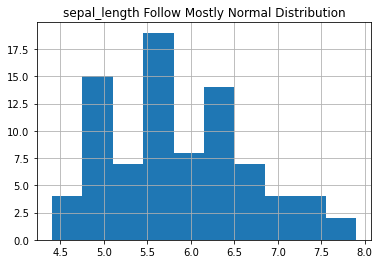

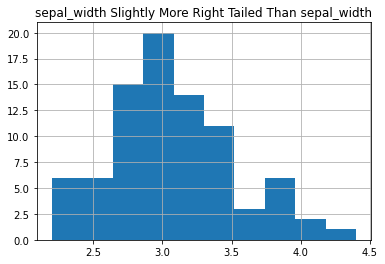

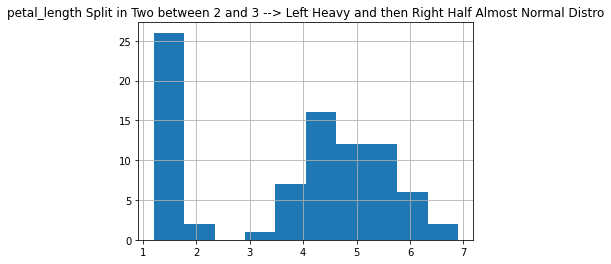

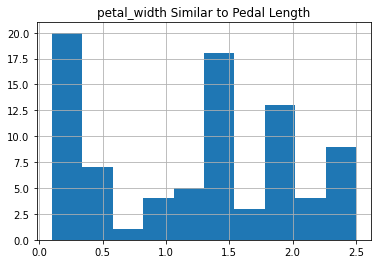

Takeaways: Petal Length and Width Similar, also Sepal Length and Width Similar Histos


In [10]:
# histograms for quantitative data
#     sepal_length
plt.title('sepal_length Follow Mostly Normal Distribution')
train_iris.sepal_length.hist()
plt.show()

#     sepal_width
plt.title('sepal_width Slightly More Right Tailed Than sepal_width')
train_iris.sepal_width.hist()
plt.show()

#     petal_length

plt.title('petal_length Split in Two between 2 and 3 --> Left Heavy and then Right Half Almost Normal Distro')
train_iris.petal_length.hist()
plt.show()

#     petal_width
plt.title('petal_width Similar to Pedal Length')
train_iris.petal_width.hist()
plt.show()

print('Takeaways: Petal Length and Width Similar, also Sepal Length and Width Similar Histos')


<AxesSubplot:title={'center':'sepal_length'}, ylabel='sepal_length'>

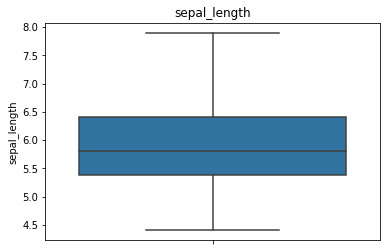

In [11]:
# boxplots for numerical variables

# speal_legnth
plt.title('sepal_length')
sns.boxplot(y = train_iris.sepal_length)

<AxesSubplot:title={'center':'sepal_width'}, ylabel='sepal_width'>

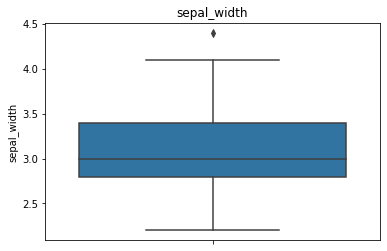

In [12]:
# speal_width
plt.title('sepal_width')
sns.boxplot(y = train_iris.sepal_width)

<AxesSubplot:title={'center':'petal_length'}, ylabel='petal_length'>

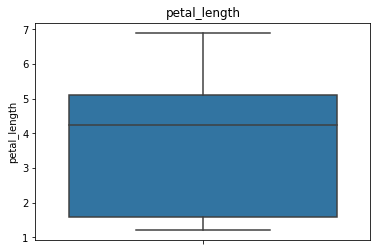

In [13]:
# petal_legnth
plt.title('petal_length')
sns.boxplot(y = train_iris.petal_length)

<AxesSubplot:title={'center':'petal_width'}, ylabel='petal_width'>

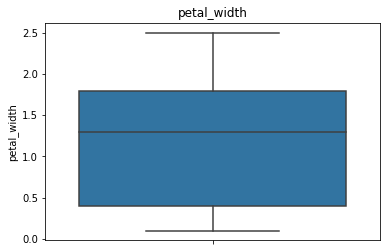

In [14]:
# petal_width
plt.title('petal_width')
sns.boxplot(y = train_iris.petal_width)

## Using a For Loop

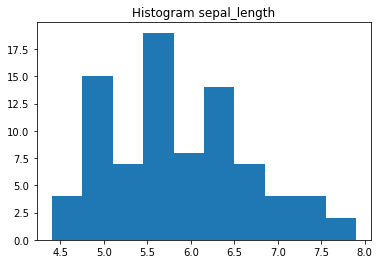

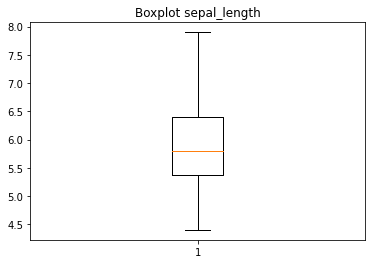

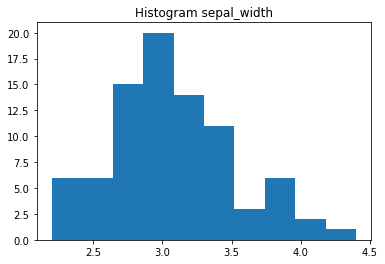

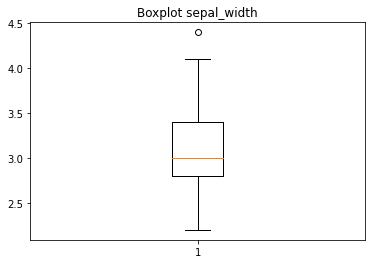

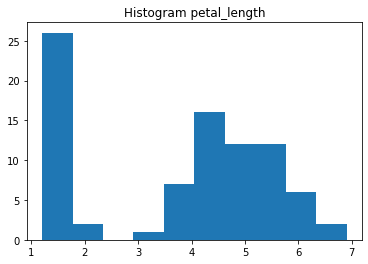

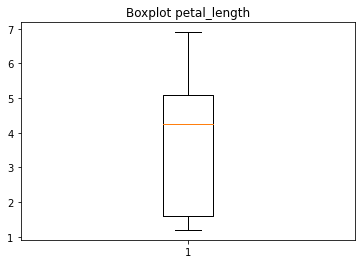

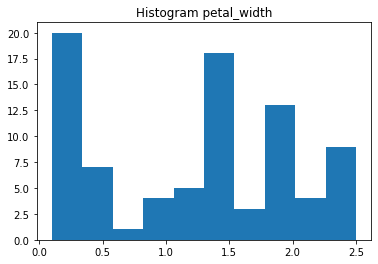

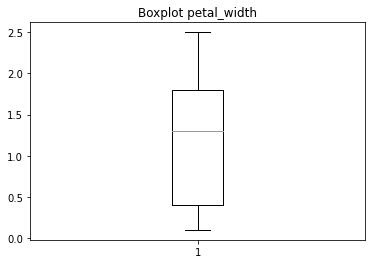

In [15]:
quant_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for col in quant_cols:
    plt.title(f'Histogram {col}')
    plt.hist(train_iris[col])
    plt.show()
    plt.title(f'Boxplot {col}')
    plt.boxplot(train_iris[col])
    plt.show()

In [16]:
# descriptive stats

for col in quant_cols:
    print(col)
    print(train_iris[col].describe())
    print()

sepal_length
count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

sepal_width
count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64

petal_length
count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

petal_width
count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64



### Takeaways:
- Sepal length and width follow pretty normal distributions
- Petal length and width look to have a split, where the left sides are bottom heavy and the right sides follow a more normal distribution

## Bivariate Stats
Here we are analyzing each feature with respect to the target variable.
- scatterplot (numeric to numeric)
- catplot, barplot, or boxplot (numeric to categorical)



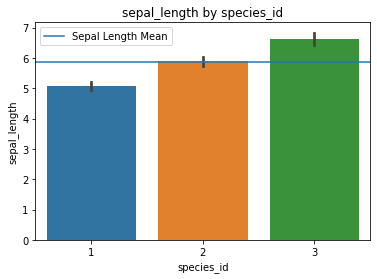

In [17]:
# Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal 
# line showing the overall mean of the metric (y-axis).

# sepal length
plt.title('sepal_length by species_id')
sns.barplot(x = 'species_id', y = 'sepal_length', data = train_iris)
# to create the mean line
sepal_length_mean = train_iris.sepal_length.mean()
plt.axhline(sepal_length_mean, label = 'Sepal Length Mean')
plt.legend()
plt.show()

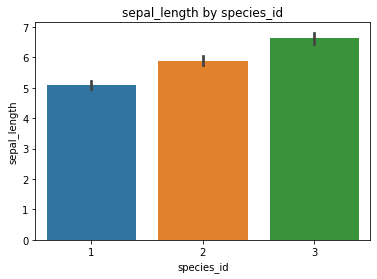

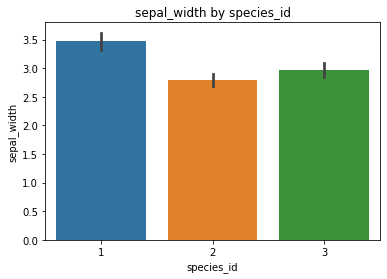

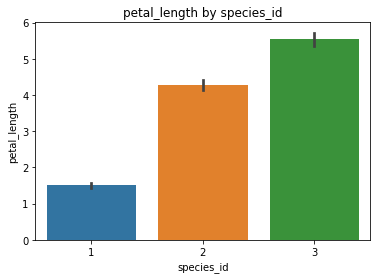

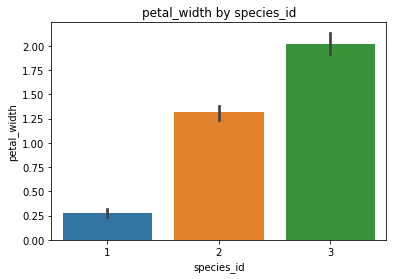

In [18]:
# using for a loop for each variable

for col in quant_cols:
    plt.title(f'{col} by species_id')
    sns.barplot(x = 'species_id', y = (col), data = train_iris)
#     to create mean line??
#     f'{col}_rate' = train_iris[col].mean()
#     plt.axhline((col)_rate, label = f'{col} Mean Line')
    plt.show()

In [19]:
# For each measurement type, compute the descriptive statistics for each species.

train_iris_setosa = train_iris[train_iris.species_id == 1]
train_iris_virginica = train_iris[train_iris.species_id == 2]
train_iris_versicolor = train_iris[train_iris.species_id == 3]

print(f'Setosa: \n {train_iris_setosa.describe()} \n')
print(f'Virginica: \n {train_iris_virginica.describe()} \n')
print(f'Versicolor: \n {train_iris_versicolor.describe()}')


Setosa: 
        species_id  sepal_length  sepal_width  petal_length  petal_width
count        28.0     28.000000    28.000000     28.000000     28.00000
mean          1.0      5.089286     3.467857      1.507143      0.27500
std           0.0      0.360390     0.427788      0.184448      0.12057
min           1.0      4.400000     2.300000      1.200000      0.10000
25%           1.0      4.875000     3.275000      1.400000      0.20000
50%           1.0      5.000000     3.400000      1.500000      0.20000
75%           1.0      5.400000     3.800000      1.600000      0.40000
max           1.0      5.800000     4.400000      1.900000      0.60000 

Virginica: 
        species_id  sepal_length  sepal_width  petal_length  petal_width
count        28.0     28.000000    28.000000     28.000000    28.000000
mean          2.0      5.896429     2.796429      4.271429     1.314286
std           0.0      0.425556     0.280848      0.409930     0.199470
min           2.0      4.900000     2.3

In [20]:
# For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) 
#     to see if there is a significant difference between the two groups. 
#     Do the same for the other measurement types.

t_pw, p_pw = stats.mannwhitneyu(train_iris_virginica.petal_width, train_iris_versicolor.petal_width, alternative = 'two-sided')
print(t_pw, p_pw)
print()

t_pl, p_pl = stats.mannwhitneyu(train_iris_virginica.petal_length, train_iris_versicolor.petal_length, alternative = 'two-sided')
print(t_pl, p_pl)
print()

t_sw, p_sw = stats.mannwhitneyu(train_iris_virginica.sepal_width, train_iris_versicolor.sepal_width, alternative = 'two-sided')
print(t_sw, p_sw)
print()

t_sl, p_sl = stats.mannwhitneyu(train_iris_virginica.sepal_length, train_iris_versicolor.sepal_length, alternative = 'two-sided')
print(t_sl, p_sl)

17.0 6.47119166980993e-10

7.5 2.9479835715150625e-10

274.0 0.052572591398456964

107.5 3.082029196534108e-06


### Multivariate Stats
During this stage, we often add another dimension to our data, such as the target variable as color.

We also ask additional, more specific and targeted questions of the data, such as how subgroups compare to each-other and to the overall population. We then answer these questions using visualizations and/or hypothesis testing.

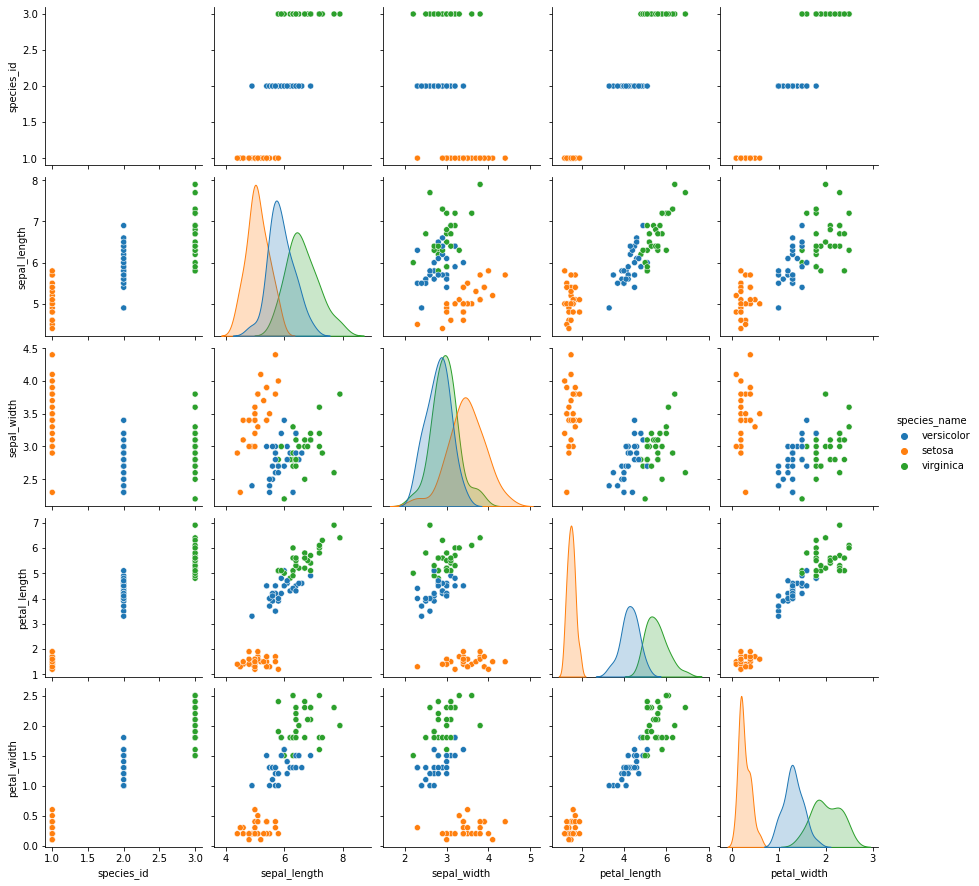

In [21]:
# pairplot

sns.pairplot(data = train_iris, hue = 'species_name')

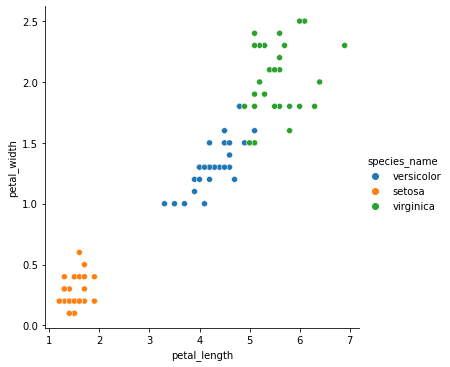

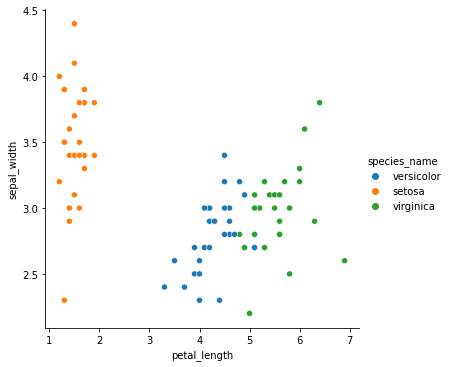

In [22]:
# Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

sns.relplot(data = train_iris, x = 'petal_length', y = 'petal_width', hue = 'species_name')
sns.relplot(data = train_iris, x = 'petal_length', y = 'sepal_width', hue = 'species_name')

In [23]:
# Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared 
#     to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, 
#     be sure assumptions are met (independence, normality, equal variance).

# Part II: Titanic

In [24]:
def get_titanic_data():
    '''
    This function reads in titanic data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('titanic_df.csv'):
        
        # If csv file exists, read in data from csv file.
        titanic_df = pd.read_csv('titanic_df.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame.
        titanic_df = new_titanic_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('titanic_df.csv')
        
    return titanic_df

In [25]:
titanic_df = get_titanic_data()

In [26]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [27]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [28]:
# for loop that prints each column will a null count > 0

for col in titanic_df:
    if titanic_df[col].isnull().sum() > 0:
        print(col)
        print(titanic_df[col].isnull().sum())

age
177
embarked
2
deck
688
embark_town
2


### Based on the null values, dropping 'age' and 'deck' columns.

In [29]:
# titanic_df.drop(columns = ['age', 'deck'], inplace = True)
titanic_df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [34]:
# splitting data

def titanic_train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    titanic_train_validate, titanic_test = functions.titanic_train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    titanic_train, titanic_validate = functions.titanic_train_test_split(titanic_train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=titanic_train_validate[target])
    return titanic_train, titanic_validate, titanic_test

In [35]:
titanic_train_validate_test_split(titanic_df, target = 'survived')

print(f'Train: {titanic_train.shape}')
print(f'Validate: {titanic_validate.shape}')
print(f'Test: {titanic_test.shape}')

AttributeError: module 'functions' has no attribute 'titanic_train_test_split'

In [ ]:
titanic_train.head()

## Part III: Telco